In [ ]:

# ********* EX - 01 *******
# what i have to do is:
# 1. I have to tune the hyperparameters to beat the best validation loss of 2.2 by andrej


# **** EX-02***********
# what i have to do is:
# 1. answer what loss we would get if the predicted probabilities at initialization were perfectly uniform
# 2. tuning the initialization to get a starting loss much similar to 1.

# what??

# ok to get uniform prediction at first does making all parameter equal do the case?
# -> i don't think so but logits should be same for any inputs right?
# How do i make logits same for any input? ok let's make all parameters zero.
# yes this do the case. because logits will all be zero and logits.exp() will all be 1. and after normalization all will be 1/27
# nice



In [ ]:
# i got dev-loss of 2.1635  train loss = 2.0786in first go. let's try to improve it even more.
# let's train again and see. I except to platue at this range. I suspect dev_loss will be more even
# ok it didn't it decrease to 2.1371. train loss = 2.0734 ok learning rate of 0.1 is ok i think, let's train again with 0.1 learning rate only

# again after 200k iterations on same hyper-parameters
  #  train loss = 2.0560
  #  dev loss = 2.1227

#ok  again it is decreased but it seems it has platued around here so let's change the hyperparameters

#first try, let's change block size form 3 to 4. why?
# ->  i don't know, it seems for names the average length of syllable is 4.


#what i changed
# 1. embedding vector size = 30. why? (do we need 30 dimensions to store the information for certain char?) - i don't think so. let's make it just 15
#    i think 15 is also too big. let's see

# 2. I think hidden layers needs to be of more size. so let's make it 300. why?
#    -->

# 3. block size = 4
# 4. do we need regularization? let's add it too.
# 5. let's increase batch size to 64


# ok better than previous but not good as expected

# dev loss = 2.1598
# train loss = 2.1004

# let's train more and see.let's use smaller learning rate now.

#dev loss = 2.14
#train loss = 2.0647

#again

#dev loss = 33
#train loss = 33

#ok i clearly messed up. i don't know why

# ok this was my best

#dev loss = 2.14
#train loss = 2.0647


In [ ]:
## assignment -2 ###
# ok loss is 3.21 with equal distribution.

In [ ]:
#I got 2.16 dev loss at first go

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
# build the dataset
block_size = 4 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182580, 4]) torch.Size([182580])
torch.Size([22767, 4]) torch.Size([22767])
torch.Size([22799, 4]) torch.Size([22799])


In [ ]:
C = torch.randn((27, 2))

In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [ ]:
h

tensor([[-0.9986,  0.7346, -0.9991,  ..., -0.8751, -1.0000, -1.0000],
        [-0.6687,  0.8889, -0.9998,  ...,  0.2028, -1.0000, -0.9997],
        [-0.8850,  0.2710, -0.9931,  ...,  0.9155, -0.9650, -0.6140],
        ...,
        [ 0.7732,  0.9881,  0.9322,  ...,  0.9538,  0.9999, -0.2047],
        [ 0.9972,  0.9494,  0.9605,  ...,  0.9702,  0.9996,  0.3215],
        [-0.9999, -0.3118, -0.6585,  ..., -0.1879, -0.9352, -0.7521]])

In [ ]:
h.shape

torch.Size([228146, 100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([228146, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
prob.shape

torch.Size([228146, 27])

In [ ]:
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

In [ ]:
# ------------ now made respectable :) ---------------

In [ ]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [ ]:
# g = torch.Generator().manual_seed(2147483647) # for reproducibility  this was for assignment 1
# C = torch.randn((27, 15), generator=g)
# W1 = torch.randn((60, 300), generator=g)
# b1 = torch.randn(300, generator=g)
# W2 = torch.randn((300, 27), generator=g)
# b2 = torch.randn(27, generator=g)
# parameters = [C, W1, b1, W2, b2]

In [ ]:
# for assignment 2

C = torch.zeros((27, 15))
W1 = torch.zeros((60, 300))
b1 = torch.zeros(300)
W2 = torch.zeros((300, 27))
b2 = torch.zeros(27)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

26832

In [ ]:
# Xtr1 = [[1,1,1,1]]
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 60) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss


tensor(3.2958)

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (64,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.03 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

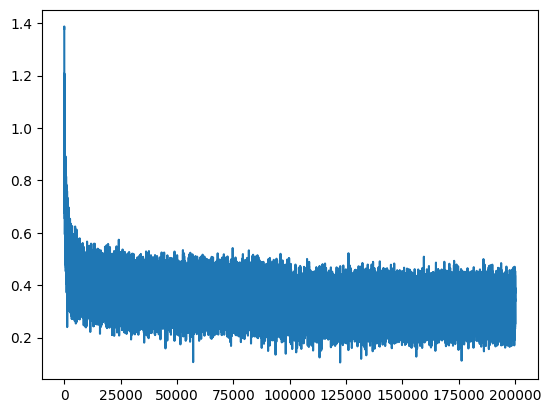

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(33.9979)

In [ ]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(34.0447)

In [ ]:
# i got dev-loss of 2.1635  train loss = 2.0786in first go. let's try to improve it even more.
# let's train again and see. I except to platue at this range. I suspect dev_loss will be more even
# ok it didn't it decrease to 2.1371. train loss = 2.0734 ok learning rate of 0.1 is ok i think, let's train again with 0.1 learning rate only

# again after 200k iterations on same hyper-parameters
  #  train loss = 2.0560
  #  dev loss = 2.1227

#ok  again it is decreased but it seems it has platued around here so let's change the hyperparameters

#first try, let's change block size form 3 to 4. why?
# ->  i don't know, it seems for names the average length of syllable is 4.


#what i changed
# 1. embedding vector size = 30. why? (do we need 30 dimensions to store the information for certain char?) - i don't think so. let's make it just 15
#    i think 15 is also too big. let's see

# 2. I think hidden layers needs to be of more size. so let's make it 300. why?
#    -->

# 3. block size = 4
# 4. do we need regularization? let's add it too.
# 5. let's increase batch size to 64


# ok better than previous but not good as expected

# dev loss = 2.1598
# train loss = 2.1004

# let's train more and see.let's use smaller learning rate now.

#dev loss = 2.14
#train loss = 2.0647

#again

#dev loss = 33
#train loss = 33

#ok i clearly messed up. i don't know why

# ok this was my best

#dev loss = 2.14
#train loss = 2.0647


In [ ]:
## assignment -2 ###
# ok loss is 3.21 with equal distribution.


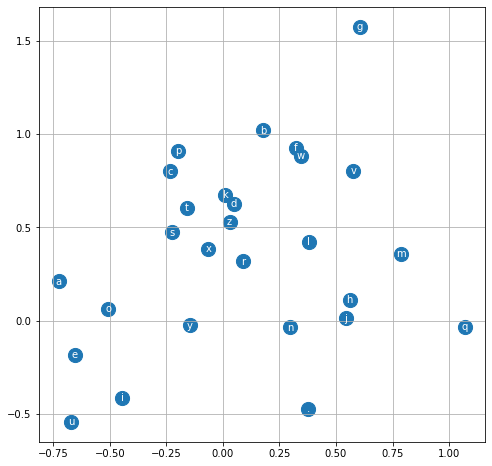

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [ ]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [ ]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

carmahela.
jhovi.
kimrin.
thil.
halanna.
jazhien.
amerynci.
aqui.
nellara.
chaiiv.
kaleigh.
ham.
joce.
quinton.
lilea.
jamilio.
jeron.
jaryni.
jace.
chrudeley.
